# CSC 177 Data Preprocessing Project

In [57]:
# Imports
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [58]:
# Import data
data = pd.read_csv("north.csv")
print(f"Number of instances = {data.shape[0]}")
print(f"Number of attributes = {data.shape[1]}")
data.head()

Number of instances = 8392320
Number of attributes = 27


,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,2000-05-09,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1,2000-05-09,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2,2000-05-09,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3,2000-05-09,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4,2000-05-09,04:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


### Translate the column names
This is done first in order to make preprocessing easier (by knowing what the columns mean).

In [59]:
print(f"Before translating names: \n{list(data.columns[1:5])}",)
data.columns = ['index', 'Date', 'Time', 'TOTAL RAINFALL, TIME (mm)',
               'ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)',
               'MAX ATMOSPHERIC PRESSURE AT THE PREVIOUS TIME. (AUT) (mB)',
               'MIN. ATMOSPHERIC PRESSURE. AT THE PREVIOUS TIME. (AUT) (mB)',
               'GLOBAL RADIATION (Kj/m²)',
               'AIR TEMPERATURE - DRY BULB, TIME (°C)',
               'DEW POINT TEMPERATURE (°C)',
               'MAXIMUM TEMPERATURE AT THE PREVIOUS TIME. (AUT) (°C)',
               'MINIMUM TEMPERATURE AT THE PREVIOUS TIME. (AUT) (°C)',
               'TEMPERATURE DEW MAX. AT THE PREVIOUS TIME. (AUT) (°C)',
               'DEW TEMPERATURE MIN. AT THE PREVIOUS TIME. (AUT) (°C)',
               'REL. HUMIDITY MAX. AT THE PREVIOUS TIME. (AUT) (%)',
               'REL. HUMIDITY MIN. AT THE PREVIOUS TIME. (AUT) (%)',
               'AIR RELATIVE HUMIDITY, HOURLY (%)',
               'WIND, TIMED DIRECTION (gr) (° (gr))', 'WIND, MAXIMUM gust (m/s)',
               'WIND, HOURLY SPEED (m/s)', 'region', 'state', 'station',
               'station_code', 'latitude', 'longitude', 'height'
               ]
print(f"After: \n{list(data.columns[1:5])}")
data.head()

Before translating names: 
['Data', 'Hora', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)']
After: 
['Date', 'Time', 'TOTAL RAINFALL, TIME (mm)', 'ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)']


,index,Date,Time,"TOTAL RAINFALL, TIME (mm)","ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)",MAX ATMOSPHERIC PRESSURE AT THE PREVIOUS TIME. (AUT) (mB),MIN. ATMOSPHERIC PRESSURE. AT THE PREVIOUS TIME. (AUT) (mB),GLOBAL RADIATION (Kj/m²),"AIR TEMPERATURE - DRY BULB, TIME (°C)",DEW POINT TEMPERATURE (°C),...,"WIND, TIMED DIRECTION (gr) (° (gr))","WIND, MAXIMUM gust (m/s)","WIND, HOURLY SPEED (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,2000-05-09,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1,2000-05-09,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2,2000-05-09,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3,2000-05-09,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4,2000-05-09,04:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


### Dropping Fields
Then, drop fields that are of no value for our purpose.

In [60]:
print(f"Before drop (first five): \n{list(data.columns[:5])}")
data.drop(["index",
           "Time", 
           "station",
           "station_code",
           "latitude",
           "longitude",
           "MAX ATMOSPHERIC PRESSURE AT THE PREVIOUS TIME. (AUT) (mB)",
           "MIN. ATMOSPHERIC PRESSURE. AT THE PREVIOUS TIME. (AUT) (mB)",
           "GLOBAL RADIATION (Kj/m²)",
           "AIR TEMPERATURE - DRY BULB, TIME (°C)",
           "MINIMUM TEMPERATURE AT THE PREVIOUS TIME. (AUT) (°C)",
           "MAXIMUM TEMPERATURE AT THE PREVIOUS TIME. (AUT) (°C)",
           "ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)",
           "TEMPERATURE DEW MAX. AT THE PREVIOUS TIME. (AUT) (°C)",
           "DEW TEMPERATURE MIN. AT THE PREVIOUS TIME. (AUT) (°C)",
           "REL. HUMIDITY MAX. AT THE PREVIOUS TIME. (AUT) (%)",
           "REL. HUMIDITY MIN. AT THE PREVIOUS TIME. (AUT) (%)",
           "AIR RELATIVE HUMIDITY, HOURLY (%)",
           "region",
          ], axis=1, inplace=True)
print(f"After drop: \n{list(data.columns)}")
data.head()

Before drop (first five): 
['index', 'Date', 'Time', 'TOTAL RAINFALL, TIME (mm)', 'ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)']
After drop: 
['Date', 'TOTAL RAINFALL, TIME (mm)', 'DEW POINT TEMPERATURE (°C)', 'WIND, TIMED DIRECTION (gr) (° (gr))', 'WIND, MAXIMUM gust (m/s)', 'WIND, HOURLY SPEED (m/s)', 'state', 'height']


,Date,"TOTAL RAINFALL, TIME (mm)",DEW POINT TEMPERATURE (°C),"WIND, TIMED DIRECTION (gr) (° (gr))","WIND, MAXIMUM gust (m/s)","WIND, HOURLY SPEED (m/s)",state,height
0,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25
1,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25
2,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25
3,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25
4,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25


### Data Quality

A large number of values in the dataset are set to -9999. Make sure those are removed first before doing any other preprocessing.

In [61]:
print(f"Number of rows that before -9999: {data.shape[0]}")
data = data[(data["TOTAL RAINFALL, TIME (mm)"] != -9999.0)]
data = data[(data["DEW POINT TEMPERATURE (°C)"] != -9999.0)]
data = data[(data["WIND, TIMED DIRECTION (gr) (° (gr))"] != -9999.0)]
data = data[(data["WIND, MAXIMUM gust (m/s)"] != -9999.0)]
data = data[(data["WIND, HOURLY SPEED (m/s)"] != -9999.0)]
data = data[(data["height"] != -9999.0)]
print(f"Number of rows that after removing -9999: {data.shape[0]}")

Number of rows that before -9999: 8392320
Number of rows that after removing -9999: 5903974


### Sampling

This dataset is much bigger than what is needed for our purposes. Let's shrink this down early so we can improve speed.

In [62]:
print(f"Number of rows before sampling: {data.shape[0]}")
data = data.sample(frac=0.01, random_state=1)
print(f"Number of rows after sampling: {data.shape[0]}")

Number of rows before sampling: 5903974
Number of rows after sampling: 59040


### Delete Duplicate Values

Next, delete duplicate values to avoid processing false data.

In [63]:
dupes = data.duplicated()
print(f"Number of duplicate rows = {dupes.sum()}")

Number of duplicate rows = 0


We don't actually have duplicate rows for our case, since there is a unique date field in each row. This is the following result if we set the first 500 rows to be duplicated

In [64]:
dupes = data
print(f"Number of rows before discarding duplicates = {dupes.shape[0]}")
dupes.iloc[:500] = dupes.iloc[-1]
dupes = dupes.drop_duplicates()
print(f"Number of rows after discarding duplicates = {dupes.shape[0]}")

Number of rows before discarding duplicates = 59040
Number of rows after discarding duplicates = 58540


### Replace Missing Values

Do this now so we are not messing around with missing data, possibly getting false results. In our case, we have no missing values, so we are good here.

In [65]:
data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 59040
Number of attributes = 8
Number of missing values:
	Date: 0
	TOTAL RAINFALL, TIME (mm): 0
	DEW POINT TEMPERATURE (°C): 0
	WIND, TIMED DIRECTION (gr) (° (gr)): 0
	WIND, MAXIMUM gust (m/s): 0
	WIND, HOURLY SPEED (m/s): 0
	state: 0
	height: 0


Since we don't have any missing values, let's see what it would be like if we did.

In [66]:
missing_data = data["DEW POINT TEMPERATURE (°C)"][:10] 

# Insert "missing" data
missing_data[2], missing_data[4] = "?", "?"        
missing_data = missing_data.replace("?", np.NaN)
print(f"Before missing data: \n\n{missing_data}\n")

missing_data = missing_data.fillna(missing_data.median())

print(f"After replacing missing values: \n\n{missing_data}")

Before missing data: 

7019044    22.0
1922446    22.0
5081799    22.0
5653236    22.0
633624     22.0
3752018    22.0
499902     22.0
1904786    22.0
5467555    22.0
1888731    22.0
2           NaN
4           NaN
Name: DEW POINT TEMPERATURE (°C), dtype: float64

After replacing missing values: 

7019044    22.0
1922446    22.0
5081799    22.0
5653236    22.0
633624     22.0
3752018    22.0
499902     22.0
1904786    22.0
5467555    22.0
1888731    22.0
2          22.0
4          22.0
Name: DEW POINT TEMPERATURE (°C), dtype: float64


C:\Users\qh002\AppData\Local\Temp\ipykernel_16124\4264843551.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  missing_data = data["DEW POINT TEMPERATURE (°C)"][:10]


### Outliers

Now that we're done cleaning up the messy data, let's move on to removing outliers, since those may alter our results in a negative manner.

<AxesSubplot: >

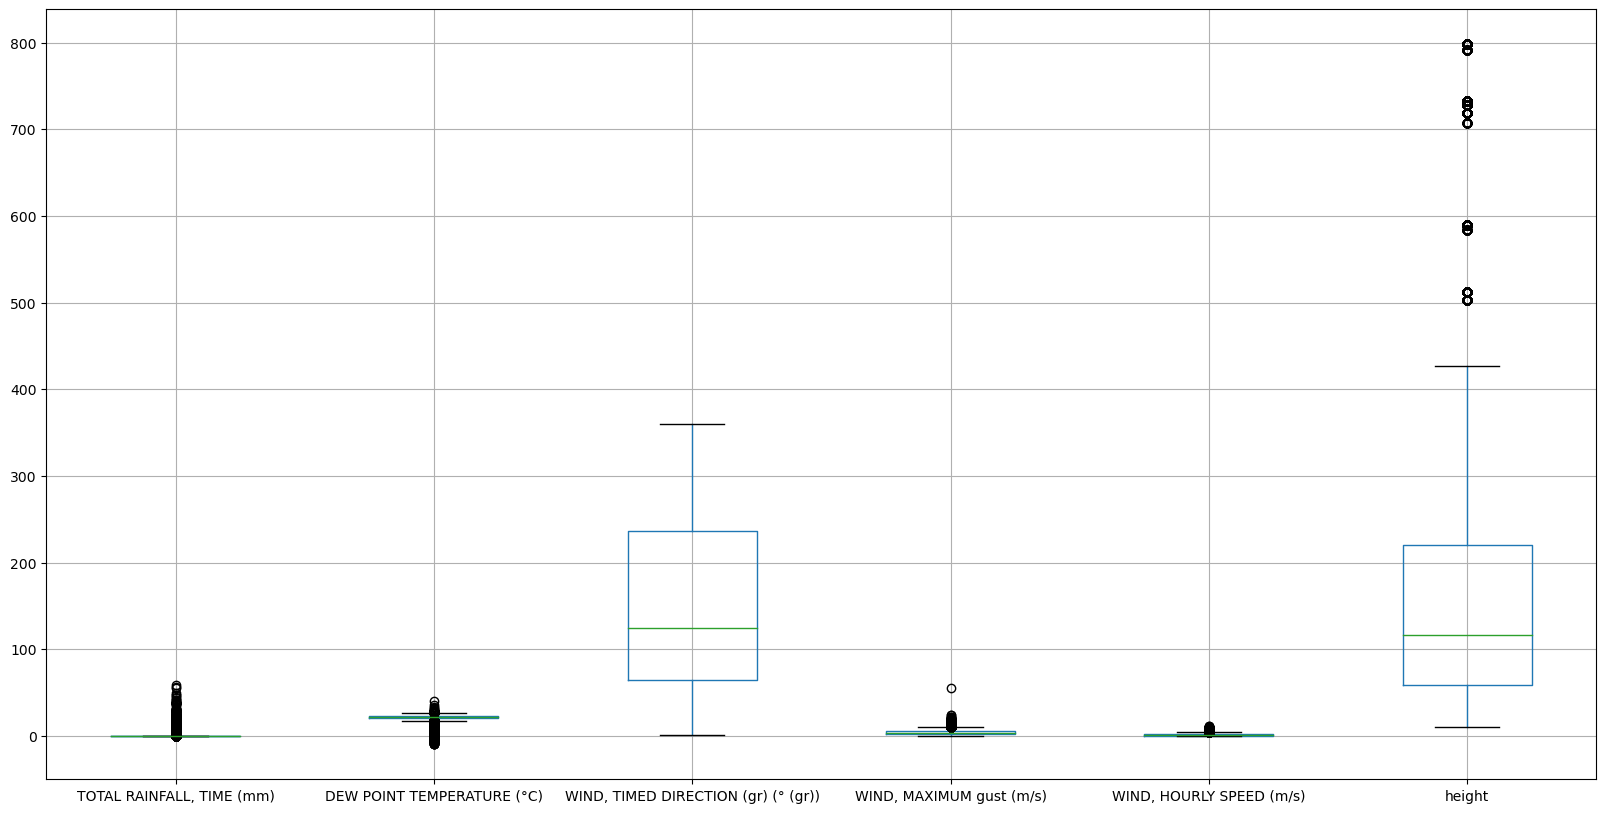

In [67]:
%matplotlib inline

data.boxplot(figsize=(20, 10))

There are outliers in the first, second, fourth, fifth and sixth fields, but we'll ignore those in `TOTAL RAINFALL, TIME (mm)` since a majority of those are caused by a rainfall time of 0 (which is normal)

In [68]:
print(f"Number of rows before discarding outliers: {data.shape[0]}")
# Remove outliers that have a zscore > 3 or < -3
data = data[(np.abs(stats.zscore(data["DEW POINT TEMPERATURE (°C)"])) < 3)]
data = data[(np.abs(stats.zscore(data["WIND, MAXIMUM gust (m/s)"])) < 3)]
data = data[(np.abs(stats.zscore(data["WIND, HOURLY SPEED (m/s)"])) < 3)]
data = data[(np.abs(stats.zscore(data["height"])) < 3)]

print(f"Number of rows before discarding outliers: {data.shape[0]}")

Number of rows before discarding outliers: 59040
Number of rows before discarding outliers: 54921


### Discretization

We can get a better idea of the data by using discretization. This is one of the last steps since we've filtered out most of the bad data.

<AxesSubplot: >

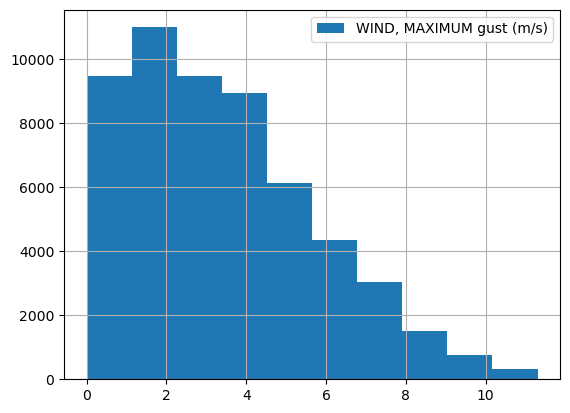

In [69]:
data["WIND, MAXIMUM gust (m/s)"].hist(legend=True) # defaults to 10 bins

Also using methods such as `cut()` and `qcut()` help us to see the frequency of the data.

In [70]:
bins = pd.cut(data["WIND, MAXIMUM gust (m/s)"],4)
bins.value_counts(sort=False)

(-0.0113, 2.825]    25839
(2.825, 5.65]       19108
(5.65, 8.475]        8181
(8.475, 11.3]        1793
Name: WIND, MAXIMUM gust (m/s), dtype: int64

In [71]:
bins = pd.qcut(data["WIND, MAXIMUM gust (m/s)"],4)
bins.value_counts(sort=False)

(-0.001, 1.6]    14549
(1.6, 3.0]       13050
(3.0, 4.9]       13683
(4.9, 11.3]      13639
Name: WIND, MAXIMUM gust (m/s), dtype: int64

### Principal Component Analysis

This can be done the same time as discretization. Let's see if the attributes of wind and dew point temperature have a correlation in two different states (Amazonas and Pará).

In [72]:
features = ["WIND, MAXIMUM gust (m/s)", "DEW POINT TEMPERATURE (°C)"]
x = data.loc[:, features].values
y = data.loc[:,['state']].values
x = StandardScaler().fit_transform(x)

In [73]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
principalDf.head()

,pc1,pc2
0,-0.019883,-0.138299
1,-0.019883,-0.138299
2,-0.019883,-0.138299
3,-0.019883,-0.138299
4,-0.019883,-0.138299


In [74]:
finalDf = pd.concat([principalDf, data["state"]], axis = 1)

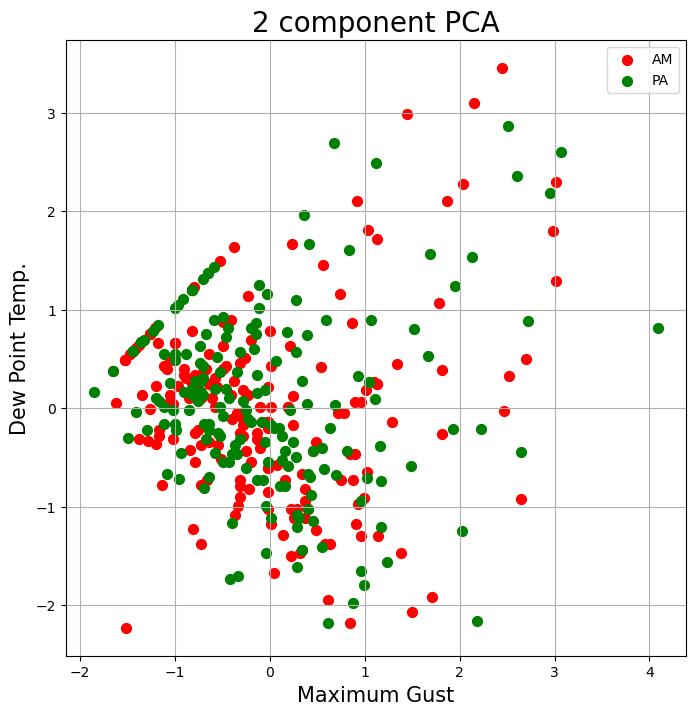

In [75]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Maximum Gust', fontsize = 15)
ax.set_ylabel('Dew Point Temp.', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['AM', 'PA']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['state'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Aggregation

This can be done the same time as the two before to help visualize the data.

Text(0.5, 1.0, 'Monthly Rainfall (variance = 2511.4630)')

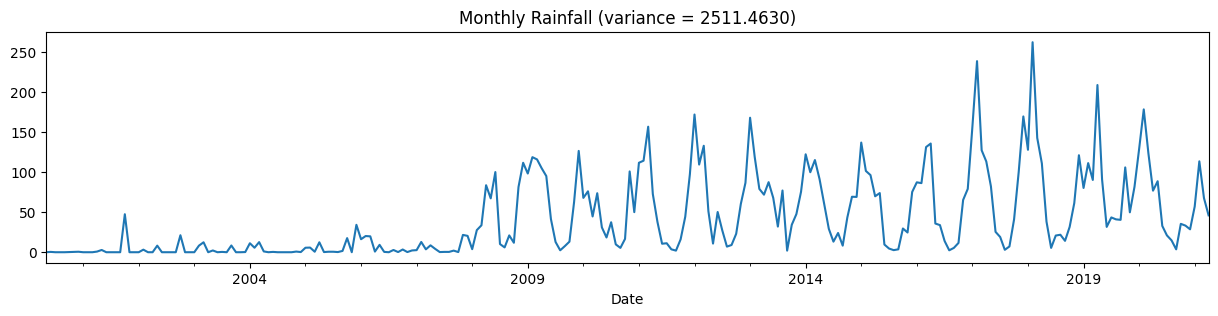

In [22]:
daily = data
daily.index = pd.to_datetime(daily['Date'])
daily = daily['TOTAL RAINFALL, TIME (mm)']
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Rainfall (variance = %.4f)' % (monthly.var()))

In [78]:
training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

training_mean = training_data.mean()
testing_mean = testing_data.mean()

training_sd = training_data.std()
testing_sd = testing_data.std()

print(f"\nMean of Training Data")
print(training_mean)
print(f"\nMean of Testing Data")
print(testing_mean)
print(f"\nStandard Deviation of Training Data")
print(training_sd)
print(f"\nStandard Deviation of Testing Data")
print(testing_sd)

No. of training examples: 43937
No. of testing examples: 10984

Mean of Training Data
TOTAL RAINFALL, TIME (mm)                0.196063
DEW POINT TEMPERATURE (°C)              21.733810
WIND, TIMED DIRECTION (gr) (° (gr))    153.031318
WIND, MAXIMUM gust (m/s)                 3.400125
WIND, HOURLY SPEED (m/s)                 1.158668
height                                 138.422061
dtype: float64

Mean of Testing Data
TOTAL RAINFALL, TIME (mm)                0.187145
DEW POINT TEMPERATURE (°C)              21.720530
WIND, TIMED DIRECTION (gr) (° (gr))    152.678259
WIND, MAXIMUM gust (m/s)                 3.403469
WIND, HOURLY SPEED (m/s)                 1.163183
height                                 139.474252
dtype: float64

Standard Deviation of Training Data
TOTAL RAINFALL, TIME (mm)                1.546583
DEW POINT TEMPERATURE (°C)               2.395816
WIND, TIMED DIRECTION (gr) (° (gr))    103.806274
WIND, MAXIMUM gust (m/s)                 2.382614
WIND, HOURLY SPEED (m/s) 

C:\Users\qh002\AppData\Local\Temp\ipykernel_16124\3089652724.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  training_mean = training_data.mean()
C:\Users\qh002\AppData\Local\Temp\ipykernel_16124\3089652724.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  testing_mean = testing_data.mean()
C:\Users\qh002\AppData\Local\Temp\ipykernel_16124\3089652724.py:9: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None'